In [1]:
#EXPLORATORY DATA ANALYSIS
#1 - import libraries for df and plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR, LinearSVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

#os.chdir('C:\\Users\Matthew...')
path = os.getcwd()

#2 - use pandas to read wine_fraud
df = pd.read_csv("wine_fraud.csv")

In [2]:
#3 check out info(), head() and describe methods
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   object 
 12  type                  6497 non-null   object 
dtypes: float64(11), object(2)
memory usage: 660.0+ KB


In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


In [5]:
#4 what are the unique values we are trying to predict (quality)?
#We are trying to predict the quality, if the wine is legit or fraud (classification problem)

<AxesSubplot:xlabel='quality', ylabel='count'>

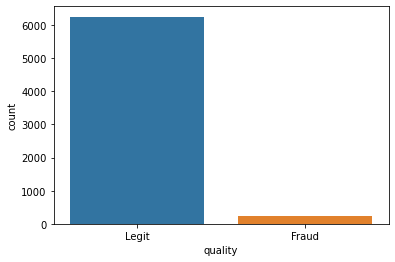

In [6]:
#5 create a countplot that displays the count of legit vs fraud
sns.countplot(x = "quality", data=df)

<AxesSubplot:xlabel='type', ylabel='count'>

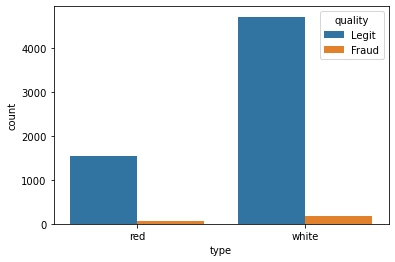

In [7]:
#6 create a countplot that has wine type on X with hue for fraud vs legit
sns.countplot(x = "type", hue = "quality", data=df)

In [8]:
#Calculate correlations between features and the quality column
#Function to process and store an estimated age
def processStr(cols):   
    Quality = cols[11]
    if pd.isnull(Quality):
        return 0
    else:
        if Quality == "Legit":           
            return 1
        elif Quality == "Fraud":           
            return 2

In [9]:
df['quality'] = df.apply(processStr, axis=1)

In [10]:
df.corr()['quality']

fixed acidity           0.021794
volatile acidity        0.151228
citric acid            -0.061789
residual sugar         -0.048756
chlorides               0.034499
free sulfur dioxide    -0.085204
total sulfur dioxide   -0.035252
density                 0.016351
pH                      0.020107
sulphates              -0.034046
alcohol                -0.051141
quality                 1.000000
Name: quality, dtype: float64

<AxesSubplot:xlabel='quality', ylabel='quality'>

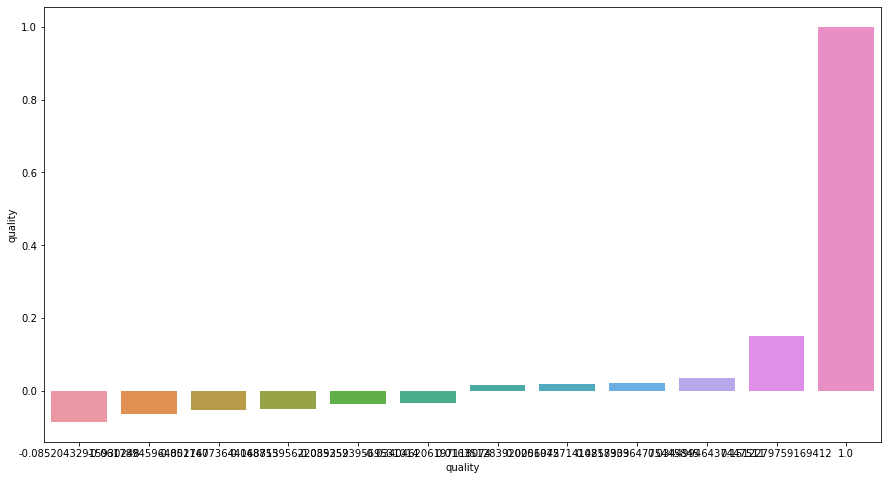

In [11]:
#Create a bar plot of the correlation values to fraudlent wine
plt.figure(figsize=(15,8))
sns.barplot(x = df.corr()['quality'], y = df.corr()['quality'], data=df)

In [12]:
#MACHINE LEARNING SVM
#Convert the categorical column "type" from a string or "red" or "white" to dummy variables
df["type"] = pd.get_dummies(df["type"])

In [13]:
#10 Seperate out the data into X features and y target label (quality)
y = df["quality"]
X = df.drop("quality", axis = 1)

In [14]:
# 11 Perform tran|test split, 10% test size, random state 101
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

In [15]:
#12 scale the X train and X test data
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [16]:
#13 create an instance of the SVM classifier, add argument for unbalanced classes
base_model = SVC(kernel = "linear", C = 0.5)
base_model.fit(scaled_X_train, y_train)

SVC(C=0.5, kernel='linear')

In [17]:
#14 Use GridSearchCV to run a grid search for the best C and gamma parameters
param_grid = {'C':[0.001, 0.01, 0.1, 0.5, 1], 'gamma':['scale', 'auto']}
grid = GridSearchCV(base_model, param_grid = param_grid)
grid.fit(scaled_X_train,y_train)
y_pred = grid.predict(scaled_X_test)

In [18]:
grid.best_params_

{'C': 0.001, 'gamma': 'scale'}

In [19]:
#15 Display the confusion matrix and classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.96      1.00      0.98       623
           2       0.00      0.00      0.00        27

    accuracy                           0.96       650
   macro avg       0.48      0.50      0.49       650
weighted avg       0.92      0.96      0.94       650



C:\Users\Matthew\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
plot_confusion_matrix(grid, scaled_X_test, y_test)

ValueError: plot_confusion_matrix only supports classifiers

In [21]:
#16 Would you suggest using this model? Realistically would this work?
#all values in the classification report range from 92-96% for the weighted average, this performed pretty well and should
#Realistically work

In [23]:
#DECISION TREE
# 17 Create an instance of decision tree classifier to predict X_test
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
base_pred = model.predict(X_test)

In [26]:
# 18 display confusion matrix and classificationr eport for your model
print(classification_report(y_test, base_pred))

              precision    recall  f1-score   support

           1       0.96      0.97      0.97       623
           2       0.22      0.19      0.20        27

    accuracy                           0.94       650
   macro avg       0.59      0.58      0.58       650
weighted avg       0.93      0.94      0.94       650



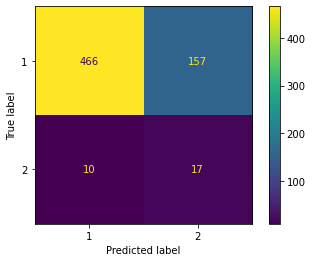

In [29]:
plot_confusion_matrix(model, scaled_X_test, y_test)

In [ ]:
#19 how did this model perform? Realistically would this work?
#This model had a avg weight of 93-94% for precision, recall, and f1 score. It should work realistically